# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Srie Wahyudhanis Hadis, S.Kom
- **Email:** sriewahyudhanis.hadis@gmail.com
- **ID Dicoding:** sriewahyudhanis.hadis@gmail.com

## Menentukan Pertanyaan Bisnis

- Faktor apakah yang membuat penyewaan sepeda paling besar?
- Pada pukul berapa dan kondisi bagaimana penyewaan sering terjadi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

## Data Wrangling

### Gathering Data

#### Memanggil data day.csv

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Memanggil data hour.csv

In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data pada tabel day_df terdiri dari data peminjaman dalam satu hari yang didapat dari banyaknya transaksi peminjaman pada hari itu, hal ini dapat terlihat pada entitas cnt, yang merangkum peminjaman pada tanggal tersebut
- Data pada tabel hour_df terdiri dari peminjaman yang berdasarkan pada waktu dalam satu hari. Dapat dilihat dari peminjaman pada jam 1 pada tanggal 1 bulan 1 tahun 2011 terjadi peminjaman sebanyak 40 kali

### Assessing Data

#### Melihat tipe data tabel day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### Melihat missing value tabel day_df

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Memeriksa duplikasi data pada tabel day_df

In [6]:
print("Jumlah duplikasi data pada tabel: ", day_df.duplicated().sum())

Jumlah duplikasi data pada tabel:  0


#### Memeriksa parameter statistik numerik tabel day_df

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Melihat tipe data tabel hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### Melihat missing value tabel hour_df

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Memeriksa duplikasi data tabel hour_df

In [10]:
print("Jumlah duplikasi data pada tabel :", hour_df.duplicated().sum())

Jumlah duplikasi data pada tabel : 0


#### Memeriksa parameter statistik numerik tabel hour_df

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Setelah melakukan assesing data pada tabel day_df, tidak ditemukan duplikasi data ataupun data yang hilang, tetapi dapat dilihat bahwa tipe data pada  entitas dteday tidak sesuai karena menggunakan tipe data objek. Sedangkan pada statistik numerik tidak terlihat data yang berada diluar outliernya. Dapat disimpulkan data yang sudah ada pada tabel day_df 90% bersih dan dapat digunakan
- Data pada tabel day_df pada kolom season, weathershit, year, holiday, workingday dan weekday berbentuk numerik dan perlu pengartian selanjutnya
- Setelah melakukan assesing data pada tabel hour_df, juga tidak ditemukan duplikasi data dan juga data yang hilang, tetapi tipe data untuk entitas dteday tidak sesuai karena seharusnya bertipe data datetime. Sedangkan pada statistik numerik tidak ditemukan data yang berada di luar outlier. Seperti pada tabel day_df, dapat disimpulkan data hour_df 90% bersih dan dapat digunakan 
- begitu juga data pada tabel hour_df pada kolom season, weathershit, year, holiday, workingday dan weekday berbentuk numerik dan perlu pengartian selanjutnya

### Cleaning Data

#### Mengubah tipe data yang salah pada tabel day_df

In [12]:
datetime_column = ["dteday"]

for column in datetime_column:
    day_df[column] = pd.to_datetime(day_df[column])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Mengubah tipe data dteday pada tabel hour_df

In [15]:
datetime_column = ["dteday"]

for column in datetime_column:
    hour_df[column] = pd.to_datetime(hour_df[column])

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [17]:
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Bagian cleaning data pada tabel day_df hanya melakukan perubahan tipe data yang sesuai pada entitas dteday
- Seperti halnya clening data pada tabel hour_df hanya melakukan perubahan tipe data yang sesuai dengan entitas dteday

## Exploratory Data Analysis (EDA)

### Explore tabel day_df

#### melihat statistik keseluruhan tabel day_df

In [18]:
day_df.describe(include="all")

C:\Users\Riri\AppData\Local\Temp/ipykernel_4644/282069457.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


#### Mengganti label numerik pada musim

In [19]:
day_df["season"]= day_df.season.apply(lambda x: "springer" if x == 1 else ("summer" if x == 2 else ("fall" if x == 3 else "winter")))
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### melihat jumlah penyewaan sepeda berdasarkan season

In [20]:
day_df.groupby(by="season").cnt.sum()

season
fall        1061129
springer     471348
summer       918589
winter       841613
Name: cnt, dtype: int64

#### mengubah data weekday menggunakan label

In [21]:
day_df["weekday"]= day_df.weekday.apply(lambda x: "sunday" if x == 0 else ("monday" if x == 1 else ("tuesday" if x == 2 else ("wednesday" if x == 3 else ("thursday" if x == 4 else("friday" if x ==5 else "saturday"))))))
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,0,monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,0,tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,0,wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### melihat jumlah penyewaan berdasarkan hari kerja

In [22]:
day_df.groupby(by = "weekday").cnt.sum().sort_values(ascending=False)

weekday
friday       487790
thursday     485395
saturday     477807
wednesday    473048
tuesday      469109
monday       455503
sunday       444027
Name: cnt, dtype: int64

#### memberikan label pada cuaca

In [23]:
day_df["weathersit"]= day_df.weathersit.apply(lambda x: "clear, few clouds, partly cloudy" if x == 1 else ("mist + cloudy, mist + broken, mist + few clouds" if x == 2 else ("light snow, light rain + thunderstorm + scatter clouds, light rain + scatter clouds" if x == 3 else "heavy rain + ice pallets + thunderstorm + mist, snow + fog")))
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,saturday,0,"mist + cloudy, mist + broken, mist + few clouds",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,sunday,0,"mist + cloudy, mist + broken, mist + few clouds",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,0,monday,1,"clear, few clouds, partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,0,tuesday,1,"clear, few clouds, partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,0,wednesday,1,"clear, few clouds, partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### memberikan label pada tahun

In [24]:
day_df["yr"]= day_df.yr.apply(lambda x: 2011 if x == 0 else 2012)
day_df.sample()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
44,45,2011-02-14,springer,2011,2,0,monday,1,"clear, few clouds, partly cloudy",0.415,0.39835,0.375833,0.417908,208,1705,1913


#### melihat penyewaan sepeda yang terjadi bedasarkan kelompk musim dan tahun

In [25]:
day_df.groupby(by = ["season", "yr"]).agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : ["max", "min", "mean"]
})

casual registered   cnt                   
                  sum        sum   max   min         mean
season   yr                                              
fall     2011   95450     324200  6043  1115  4464.361702
         2012  130641     510838  8714  4073  6824.244681
springer 2011   21425     128575  3239   431  1666.666667
         2012   39197     282151  7836   441  3531.296703
summer   2011   77564     269752  5805   795  3775.173913
         2012  125958     445315  8362  1027  6209.489130
winter   2011   52813     273324  5511   627  3664.460674
         2012   76969     438507  8555    22  5791.865169

#### Memberi label pada workingday

In [26]:
day_df["workingday"]= day_df.workingday.apply(lambda x: "holiday/week end" if x == 0 else "working day")
day_df.sample()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
294,295,2011-10-22,winter,2011,10,0,saturday,holiday/week end,"clear, few clouds, partly cloudy",0.4225,0.425492,0.629167,0.092667,1499,2809,4308


#### Melihat penyeawaan sepeda pada hari libur pertahun

In [27]:
day_df.groupby(by = ["yr","workingday"]).agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
})

casual  registered      cnt
yr   workingday                                   
2011 holiday/week end  128898      257941   386839
     working day       118354      737910   856264
2012 holiday/week end  187834      425596   613430
     working day       184931     1251215  1436146

#### Melihat korelasi pada tabel day_df

In [28]:
day_df.corr()

,instant,yr,mnth,holiday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866025,0.496702,0.016145,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
yr,0.866025,1.000000,-0.001792,0.007954,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,-0.001792,1.000000,0.019191,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.007954,0.019191,1.000000,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
temp,0.150580,0.047604,0.220205,-0.028556,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.046106,0.227459,-0.032507,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.016375,-0.110651,0.222204,-0.015937,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.112620,-0.011817,-0.207502,0.006292,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.275255,0.248546,0.123006,0.054274,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.659623,0.594248,0.293488,-0.108745,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517


**Insight tabel day_df:**
- Penyewaan sepeda selama 2 tahun paling banyak terjadi pada musim gugur sebesar 1.061.129 penyewaan
- Penyewaan sepeda selama 2 tahun pada weekday paling banyak terjadi pada hari Jum'at sebesar 487.790
- Penyewaan sepeda casual sering terjadi pada musim gugur tahun 2012 sebanyak 130.641 penyewaan, sedangkan penyewaan registered paling banyak terjadi juga pada musim gugur tahun 2012 sebanyak 510.838 penyewaan
- Penyewaan sepeda casual paling banyak terjadi pada holiday/weekend tahun 2012 sebanyak 187.834 penyewaa dan penyewaan registered paling banyak terjadi pada workingday tahun 2012 sebanyak 1.251.215 penyewaan
- Korelasi yang mendekati sempurna terjadi pada entitas atemp dan temp dengan nilai 0.99

### Eksplore tabel hour_df

#### Melihat statistik seluruh tabel hour_df

In [29]:
hour_df.describe(include="all")

C:\Users\Riri\AppData\Local\Temp/ipykernel_4644/1264340832.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


#### Memberikan label pada season

In [30]:
hour_df["season"]= hour_df.season.apply(lambda x: "springer" if x == 1 else ("summer" if x == 2 else ("fall" if x == 3 else "winter")))
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15992,15993,2012-11-04,winter,1,11,1,0,0,0,1,0.26,0.2879,0.81,0.0896,26,139,165
3353,3354,2011-05-24,summer,0,5,15,0,2,1,3,0.74,0.6818,0.55,0.4179,59,129,188
69,70,2011-01-04,springer,0,1,0,0,2,1,1,0.16,0.1818,0.55,0.1045,0,5,5
5646,5647,2011-08-28,fall,0,8,17,0,0,0,1,0.76,0.6818,0.40,0.2985,145,253,398
6540,6541,2011-10-05,winter,0,10,2,0,3,1,1,0.46,0.4545,0.82,0.1642,1,2,3
2769,2770,2011-04-30,summer,0,4,7,0,6,0,1,0.40,0.4091,0.54,0.3881,21,27,48
13414,13415,2012-07-18,fall,1,7,3,0,3,1,1,0.74,0.6970,0.66,0.1343,2,2,4
13834,13835,2012-08-04,fall,1,8,15,0,6,0,1,0.88,0.8182,0.42,0.4179,205,284,489
15072,15073,2012-09-25,winter,1,9,5,0,2,1,1,0.42,0.4242,0.77,0.0896,1,46,47
13897,13898,2012-08-07,fall,1,8,6,0,2,1,2,0.70,0.6667,0.79,0.1940,3,176,179


#### Memberikan label pada tahun

In [31]:
hour_df["yr"]= hour_df.yr.apply(lambda x: 2011 if x == 0 else 2012)
hour_df.sample()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1479,1480,2011-03-06,springer,2011,3,23,0,0,0,2,0.22,0.197,1.0,0.4179,0,9,9


#### Memberikan label pada weekday

In [32]:
hour_df["weekday"]= hour_df.weekday.apply(lambda x: "sunday" if x == 0 else ("monday" if x == 1 else ("tuesday" if x == 2 else ("wednesday" if x == 3 else ("thursday" if x == 4 else("friday" if x ==5 else "saturday"))))))
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,0,0,saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,1,1,0,saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,1,2,0,saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,1,3,0,saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,1,4,0,saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Memberikan label pada workingday

In [33]:
hour_df["workingday"]= hour_df.workingday.apply(lambda x: "holiday/week end" if x == 0 else "working day")
hour_df.sample()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11329,11330,2012-04-22,summer,2012,4,6,0,sunday,holiday/week end,2,0.44,0.4394,0.72,0.3284,6,6,12


#### Memberikan label pada weathersit

In [34]:
hour_df["weathersit"]= hour_df.weathersit.apply(lambda x: "clear, few clouds, partly cloudy" if x == 1 else ("mist + cloudy, mist + broken, mist + few clouds" if x == 2 else ("light snow, light rain + thunderstorm + scatter clouds, light rain + scatter clouds" if x == 3 else "heavy rain + ice pallets + thunderstorm + mist, snow + fog")))
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,0,0,saturday,holiday/week end,"clear, few clouds, partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,1,1,0,saturday,holiday/week end,"clear, few clouds, partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,1,2,0,saturday,holiday/week end,"clear, few clouds, partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,1,3,0,saturday,holiday/week end,"clear, few clouds, partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,1,4,0,saturday,holiday/week end,"clear, few clouds, partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


#### Melihat waktu penyewaan sepeda pada workingday berdasarkan cnt

In [35]:
hour_df.groupby(by = ["workingday","hr"]).agg({
    "casual" : "sum",
    "registered": "sum",
    "cnt" : "sum"
}).sort_values(by = "cnt", ascending=False)

casual  registered     cnt
workingday       hr                            
working day      17   28391      233729  262120
                 18   25125      220004  245129
                 8    11043      225552  236595
                 19   20429      153075  173504
                 16   24124      122144  146268
                 7     6049      138095  144144
                 20   15622      108738  124360
                 9    12059      107734  119793
                 15   23074       77189  100263
                 12   20555       79253   99808
                 13   21199       77619   98818
                 21   12256       80515   92771
                 14   22843       68576   91419
holiday/week end 13   31514       54587   86101
                 12   29163       55443   84606
                 14   32246       51987   84233
                 15   31532       51354   82886
                 16   29710       51770   81480
working day      11   18649       59833   78482
holiday/week end 17   25829       48911   74740
                 11   24637       48201   72838
working day      22    9747       59171   68918
                 10   15478       51664   67142
holiday/week end 18   19371       45272   64643
                 10   18311       40804   59115
                 19   15076       38209   53285
working day      6     2142       48698   50840
                 23    6663       37514   44177
holiday/week end 20   10756       29434   40190
                 9    10399       29246   39645
                 21    8314       24360   32674
                 22    6453       20241   26694
                 8     4718       19688   24406
                 0     3829       17055   20884
                 23    4402       15362   19764
working day      0     3546       14700   18246
holiday/week end 1     2876       13111   15987
working day      5      629       11703   12332
holiday/week end 2     2371        9752   12123
                 7     1988        8039   10027
working day      1     1833        6344    8177
holiday/week end 3     1465        4386    5851
                 6      875        3417    4292
working day      2     1041        3188    4229
                 4      360        2192    2552
                 3      428        1895    2323
holiday/week end 5      383        1546    1929
                 4      514        1362    1876

#### Melihat berapa lama penyewaan sepeda berdasarkan cuaca per tahun

In [36]:
hour_df.groupby(by = ["hr","weathersit"]).agg({
    "cnt" : "sum"
}).sort_values(by ="cnt", ascending=False).head(10)

,,cnt
hr,weathersit,
17,"clear, few clouds, partly cloudy",253718
18,"clear, few clouds, partly cloudy",229220
16,"clear, few clouds, partly cloudy",171230
19,"clear, few clouds, partly cloudy",171073
8,"clear, few clouds, partly cloudy",158998
15,"clear, few clouds, partly cloudy",133486
13,"clear, few clouds, partly cloudy",131209
14,"clear, few clouds, partly cloudy",127726
20,"clear, few clouds, partly cloudy",127332


**Insight tabel hour_df:**
- Penyewaan sepeda selama 2 tahun paling banyak terjadi pada workingday dari pukul 7 hingga pukul 21
- Penyewaan sepeda selama 2 tahun paling banyak terjadi pada cuaca clear, few, clouds, partly cloudly dari pukul 8 hingga pukul 20

### EDA menggabungkan tabel day df dan tabel hour df

In [37]:
maindata_df = pd.merge(
    left = hour_df,
    right = day_df,
    how = "left",
    left_on = "dteday",
    right_on = "dteday"
)
maindata_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,springer,2011,1,0,0,saturday,holiday/week end,"clear, few clouds, partly cloudy",...,saturday,holiday/week end,"mist + cloudy, mist + broken, mist + few clouds",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,springer,2011,1,1,0,saturday,holiday/week end,"clear, few clouds, partly cloudy",...,saturday,holiday/week end,"mist + cloudy, mist + broken, mist + few clouds",0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,springer,2011,1,2,0,saturday,holiday/week end,"clear, few clouds, partly cloudy",...,saturday,holiday/week end,"mist + cloudy, mist + broken, mist + few clouds",0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,springer,2011,1,3,0,saturday,holiday/week end,"clear, few clouds, partly cloudy",...,saturday,holiday/week end,"mist + cloudy, mist + broken, mist + few clouds",0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,springer,2011,1,4,0,saturday,holiday/week end,"clear, few clouds, partly cloudy",...,saturday,holiday/week end,"mist + cloudy, mist + broken, mist + few clouds",0.344167,0.363625,0.805833,0.160446,331,654,985


In [38]:
maindata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant_x     17379 non-null  int64         
 1   dteday        17379 non-null  datetime64[ns]
 2   season_x      17379 non-null  object        
 3   yr_x          17379 non-null  int64         
 4   mnth_x        17379 non-null  int64         
 5   hr            17379 non-null  int64         
 6   holiday_x     17379 non-null  int64         
 7   weekday_x     17379 non-null  object        
 8   workingday_x  17379 non-null  object        
 9   weathersit_x  17379 non-null  object        
 10  temp_x        17379 non-null  float64       
 11  atemp_x       17379 non-null  float64       
 12  hum_x         17379 non-null  float64       
 13  windspeed_x   17379 non-null  float64       
 14  casual_x      17379 non-null  int64         
 15  registered_x  17379 non-null  int64 

#### Membuat berkas maindata_df ke bentuk csv

In [39]:
#maindata_df.to_csv("main_data.csv", index=False)

#### Memanggil data main_data.csv

In [40]:
maindata_df = pd.read_csv("dashboard/main_data.csv")

In [41]:
maindata_df

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,springer,2011,1,0,0,saturday,holiday/week end,"clear, few clouds, partly cloudy",...,saturday,holiday/week end,"mist + cloudy, mist + broken, mist + few clouds",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,springer,2011,1,1,0,saturday,holiday/week end,"clear, few clouds, partly cloudy",...,saturday,holiday/week end,"mist + cloudy, mist + broken, mist + few clouds",0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,springer,2011,1,2,0,saturday,holiday/week end,"clear, few clouds, partly cloudy",...,saturday,holiday/week end,"mist + cloudy, mist + broken, mist + few clouds",0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,springer,2011,1,3,0,saturday,holiday/week end,"clear, few clouds, partly cloudy",...,saturday,holiday/week end,"mist + cloudy, mist + broken, mist + few clouds",0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,springer,2011,1,4,0,saturday,holiday/week end,"clear, few clouds, partly cloudy",...,saturday,holiday/week end,"mist + cloudy, mist + broken, mist + few clouds",0.344167,0.363625,0.805833,0.160446,331,654,985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,springer,2012,12,19,0,monday,working day,"mist + cloudy, mist + broken, mist + few clouds",...,monday,working day,"mist + cloudy, mist + broken, mist + few clouds",0.215833,0.223487,0.577500,0.154846,439,2290,2729
17375,17376,2012-12-31,springer,2012,12,20,0,monday,working day,"mist + cloudy, mist + broken, mist + few clouds",...,monday,working day,"mist + cloudy, mist + broken, mist + few clouds",0.215833,0.223487,0.577500,0.154846,439,2290,2729
17376,17377,2012-12-31,springer,2012,12,21,0,monday,working day,"clear, few clouds, partly cloudy",...,monday,working day,"mist + cloudy, mist + broken, mist + few clouds",0.215833,0.223487,0.577500,0.154846,439,2290,2729
17377,17378,2012-12-31,springer,2012,12,22,0,monday,working day,"clear, few clouds, partly cloudy",...,monday,working day,"mist + cloudy, mist + broken, mist + few clouds",0.215833,0.223487,0.577500,0.154846,439,2290,2729


## Visualization & Explanatory Analysis

### Pertanyaan 1:

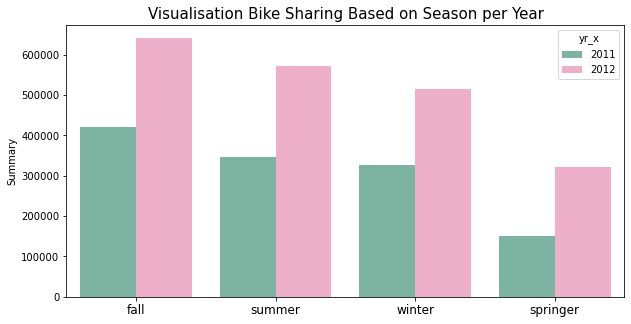

In [42]:
byseason_per_yr_df = maindata_df.groupby(by = ["season_x","yr_x"]).cnt_x.sum().reset_index()
byseason_per_yr_df.rename(columns={
    "cnt_x" : "sum"
}, inplace =True)

plt.figure(figsize=(10,5))

colors=["#73bca4", "#f8a4c7"]

sns.barplot(
    y ="sum",
    x = "season_x",
    hue = "yr_x",
    data =byseason_per_yr_df.sort_values(by ="sum", ascending=False),
    palette = colors                
)

plt.title("Visualisation Bike Sharing Based on Season per Year", loc='center', fontsize=15)
plt.ylabel("Summary")
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

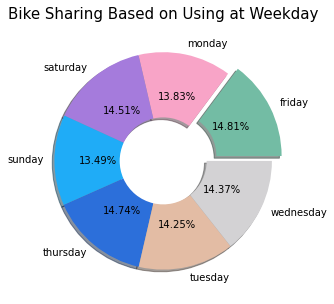

In [43]:
byweekday_df = maindata_df.groupby(by ="weekday_x").cnt_x.sum().reset_index()
byweekday_df.rename(columns={
    "cnt_x" : "sum"
}, inplace =True)

plt.figure(figsize=(10,5))

colors=["#73bca4", "#f8a4c7", "#a57bdc", "#1facf7", "#2c6fda", "#e3bca4", "#d3d2d4"]
explode = (0.1, 0, 0, 0, 0, 0, 0)

plt.pie(
    x = byweekday_df['sum'],
    labels = byweekday_df['weekday_x'],
    autopct = '%1.2f%%',
    colors=colors,
    explode = explode,
    shadow=True,
    wedgeprops={'width':0.6}
)
plt.title("Bike Sharing Based on Using at Weekday", loc="center", fontsize=15)
plt.show()

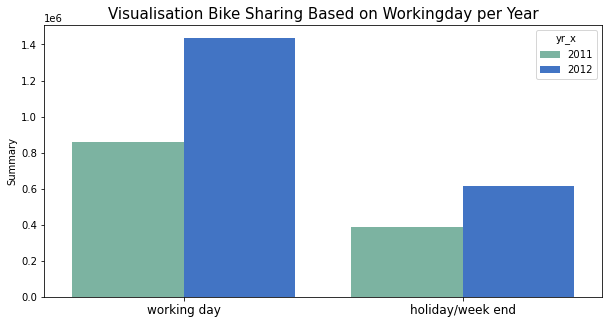

In [44]:
byworkingday_per_yr_df = maindata_df.groupby(by = ["workingday_x","yr_x"]).cnt_x.sum().reset_index()
byworkingday_per_yr_df.rename(columns={
    "cnt_x" : "sum"
}, inplace =True)

plt.figure(figsize=(10,5))

colors=["#73bca4", "#2c6fda"]

sns.barplot(
    y ="sum",
    x = "workingday_x",
    hue = "yr_x",
    data =byworkingday_per_yr_df.sort_values(by ="sum", ascending=False),
    palette = colors,
)

plt.title("Visualisation Bike Sharing Based on Workingday per Year", loc='center', fontsize=15)
plt.ylabel("Summary")
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2:

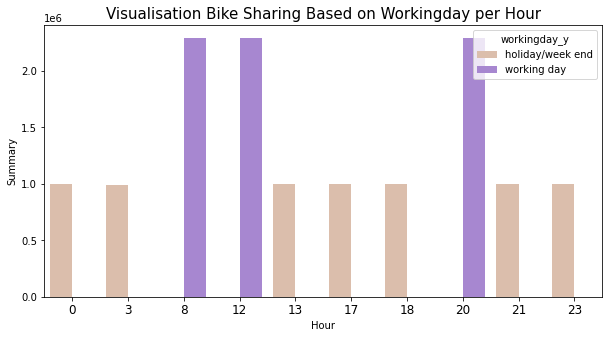

In [45]:
byworkingday_per_hr_df = maindata_df.groupby(by = ["workingday_y","hr"]).cnt_y.sum().reset_index()
byworkingday_per_hr_df.rename(columns={
    "cnt_y" : "sum"
}, inplace =True)

plt.figure(figsize=(10,5))

colors=["#e3bca4", "#a57bdc"]

sns.barplot(
    y ="sum",
    x = "hr",
    hue = "workingday_y",
    data =byworkingday_per_hr_df.sort_values(by ="sum", ascending=False).sample(10),
    palette = colors                
)

plt.title("Visualisation Bike Sharing Based on Workingday per Hour", loc='center', fontsize=15)
plt.ylabel("Summary")
plt.xlabel("Hour")
plt.tick_params(axis='x', labelsize=12)
plt.show()

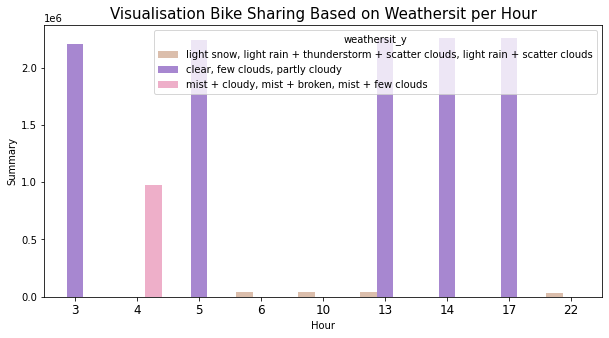

In [46]:
byweathersit_per_hr_df= maindata_df.groupby(by = ["weathersit_y", "hr"]).cnt_y.sum().reset_index()
byweathersit_per_hr_df.rename(columns={
    "cnt_y" : "sum"
}, inplace=True)

plt.figure(figsize=(10,5))

colors=["#e3bca4", "#a57bdc", "#f8a4c7", "#2c6fda" ]

sns.barplot(
    y ="sum",
    x = "hr",
    hue = "weathersit_y",
    data =byweathersit_per_hr_df.sort_values(by ="sum", ascending=False).sample(10),
    palette = colors                
)

plt.title("Visualisation Bike Sharing Based on Weathersit per Hour", loc='center', fontsize=15)
plt.ylabel("Summary")
plt.xlabel("Hour")
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
- Dari visualisasi dapat dilihat penyewaan sepeda meningkat pada tahun 2012
- Penyewaan sepeda jika dilihat berdasarkan musim, maka akan meningkat pada musim gugur
- Penyewaan sepeda paling sering terjadi dihari Jum'at
- Penyewaan sepeda sering dilakukan pada cuaca cerah berawan
- Penyewaan sepeda sering terjadi pada hari kerja bukan pada hari libur

## Analisis Lanjutan (Opsional)

**Clusterring**
- Mengelompokkan jam penyewaan sepeda terbanyak per tahun
- Mengelompokkan penyewaan sepeda berdasarkan tipe (casual atau registered) per musim

In [47]:
# Mengelompokkan jam penyewaan sepeda per tahun
clustime_df = maindata_df.groupby(by=["yr_y", "hr"]).agg({
    "cnt_x" : "sum"
}).sort_values(by = "cnt_x", ascending=False)


clustime_df.head(10)

cnt_x
yr_y hr        
2012 17  209228
     18  192787
     8   165534
     16  142126
     19  140987
2011 17  127632
     18  116985
2012 13  115580
     12  115216
     15  114559

In [48]:
# Mengelompokkan jenis penyewaan sepeda per musim
clusseason_df = maindata_df.groupby(by="season_x").agg({
    "casual_x" : "sum",
    "registered_x" : "sum"
}).sort_values(by = ["casual_x"] + ["registered_x"], ascending=False)


clusseason_df.head(10)

,casual_x,registered_x
season_x,,
fall,226091,835038
summer,203522,715067
winter,129782,711831
springer,60622,410726


### Visual Clusterring

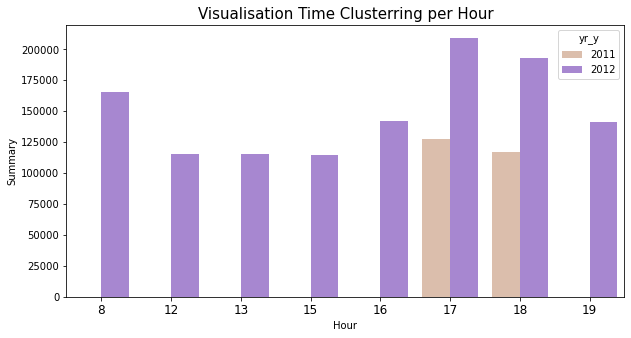

In [49]:
byclustime_df= maindata_df.groupby(by = ["yr_y", "hr"]).cnt_x.sum().reset_index()
byclustime_df.rename(columns={
    "cnt_x" : "sum"
}, inplace=True)

plt.figure(figsize=(10,5))

colors=["#e3bca4", "#a57bdc", "#f8a4c7"]

sns.barplot(
    y ="sum",
    x = "hr",
    hue="yr_y",
    data =byclustime_df.sort_values(by ="sum", ascending=False).head(10),
    palette = colors                
)

plt.title("Visualisation Time Clusterring per Hour", loc='center', fontsize=15)
plt.ylabel("Summary")
plt.xlabel("Hour")
plt.tick_params(axis='x', labelsize=12)
plt.show()

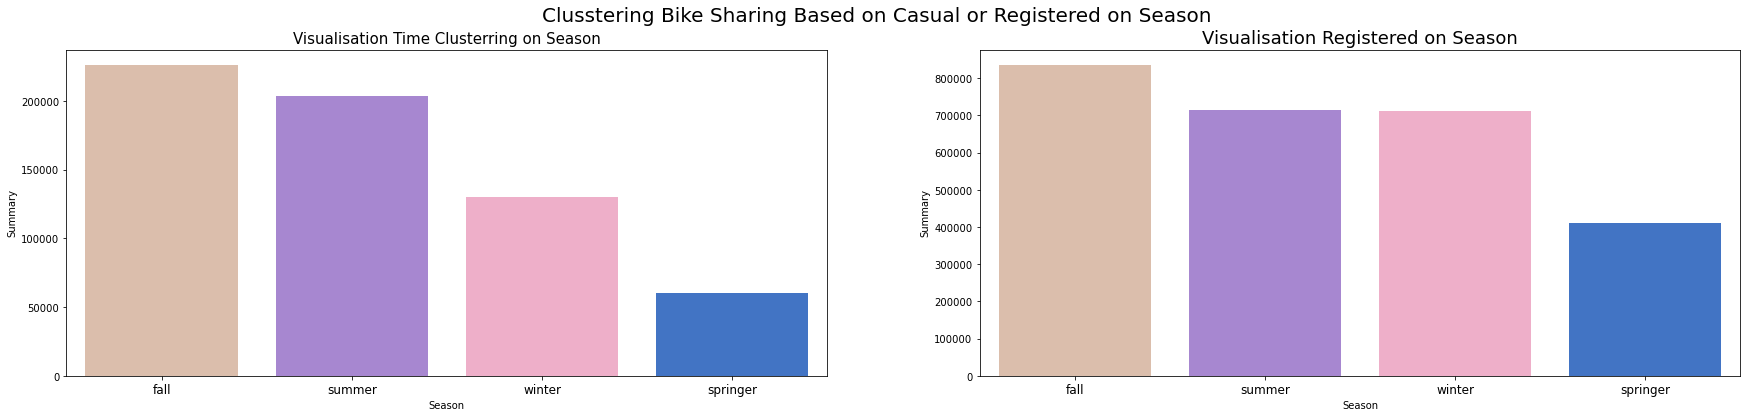

In [50]:
byclusseason_df= maindata_df.groupby(by = "season_x").casual_x.sum().reset_index()
byclusseason_df.rename(columns={
    "casual_x" : "sum",
}, inplace=True)

byclusseason1_df= maindata_df.groupby(by = "season_x").registered_x.sum().reset_index()
byclusseason1_df.rename(columns={
    "registered_x" : "sum",
}, inplace=True)

fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

colors=["#e3bca4", "#a57bdc", "#f8a4c7", "#2c6fda"]

sns.barplot(
    y ="sum",
    x = "season_x",
    #hue="yr_y",
    data =byclusseason_df.sort_values(by ="sum", ascending=False).head(10),
    palette = colors,
    ax=ax[0]
)

ax[0].set_title("Visualisation Time Clusterring on Season", loc='center', fontsize=15)
ax[0].set_ylabel("Summary")
ax[0].set_xlabel("Season")
ax[0].tick_params(axis='x', labelsize=12)

sns.barplot(
    y ="sum",
    x = "season_x",
    #hue="yr_y",
    data =byclusseason1_df.sort_values(by ="sum", ascending=False).head(10),
    palette = colors,
    ax=ax[1]
)

ax[1].set_title("Visualisation Registered on Season", loc="center", fontsize=18)
ax[1].set_ylabel("Summary")
ax[1].set_xlabel("Season")
ax[1].tick_params(axis='x', labelsize=12)

plt.suptitle("Clusstering Bike Sharing Based on Casual or Registered on Season", fontsize=20)
plt.show()

## Conclusion

- Penyewaan sepeda tiap tahun meningkat baik dilihat dari segi musim ataupun hari kerja atau libur, hal ini baik untuk melatih masyarakat dalam kegiatan menjaga bumi agar bebas polusi. Sehingga perlu di galakkan kembali iklan untuk terus menggunakan sepeda dalam berkegiatan
- Penyewaan sepeda yang sering terjadi pada cuaca cerah dan dihari kerja bisa digunakan untuk mengajak masyarakat lebih menggunakan sepeda sebagai aksi dalam menjaga kesehatan